<a href="https://colab.research.google.com/github/srijita1406/Quantitative-Analytics/blob/main/Forecasting_BankNifty_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [4]:
from google.colab import files
files=files.upload()

Saving BankNiftyFutures_Data5Min.csv to BankNiftyFutures_Data5Min.csv


In [43]:
# Read the data into a pandas DataFrame
data = pd.read_csv("BankNiftyFutures_Data5Min.csv")

In [9]:
data=data.drop('Ticker', axis=1)


In [10]:
data.head()

,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,2015-01-01 00:00:00,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,2015-01-01 00:00:00,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,2015-01-01 00:00:00,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,2015-01-01 00:00:00,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,2015-01-01 00:00:00,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [11]:
# Assuming your DataFrame is named 'df' and the column you want to split is named 'ColumnName'
data[['Date', 'Time']] = data['Date'].str.split(' ', 1, expand=True)


<ipython-input-11-081c138ca221>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Date', 'Time']] = data['Date'].str.split(' ', 1, expand=True)


In [29]:
data.head(100)

,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,2015-01-01,20150101,00:00:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,2015-01-01,20150101,00:00:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,2015-01-01,20150101,00:00:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,2015-01-01,20150101,00:00:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,2015-01-01,20150101,00:00:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015
...,...,...,...,...,...,...,...,...,...
95,2015-01-02,20150102,00:00:00,19173.4004,19183.1504,19168.0000,19177.0508,15175,2015
96,2015-01-02,20150102,00:00:00,19182.3008,19186.0000,19173.4004,19177.9004,10775,2015
97,2015-01-02,20150102,00:00:00,19176.0000,19181.7500,19172.2500,19178.0996,6725,2015
98,2015-01-02,20150102,00:00:00,19178.0000,19185.0000,19178.0000,19178.5000,7275,2015


In [14]:
columns=['Final Date format','Time']
for column in columns:
  data=data.drop(column,axis=1)



In [15]:
data.head()

,Date,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,2015-01-01,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,2015-01-01,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,2015-01-01,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,2015-01-01,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,2015-01-01,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [20]:
# Perform some basic data analysis
print("Data Analysis:")
print("Total number of data points:", len(data))
print("Minimum Close price:", data['Close 5'].min())
print("Maximum Close price:", data['Close 5'].max())
print("Average Volume:", data['Volume 5'].mean())




Data Analysis:
Total number of data points: 91737
Minimum Close price: 13445.0
Maximum Close price: 32756.8496
Average Volume: 55314.15967385025


In [44]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index)

<ipython-input-44-768ecc11300d>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.index = pd.to_datetime(data.index)


In [45]:
pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from pmdarima import auto_arima

In [47]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]



In [23]:
train.shape

(73389, 6)

In [24]:
test.shape

(18348, 6)

In [48]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Fit the auto_arima model
model = auto_arima(train['Close 5'], seasonal=False)

# Print the summary of the selected model
print(model.summary())

# Make predictions on the test set
predictions = model.predict(n_periods=len(test))

# Evaluate the model
mse = ((predictions - test) ** 2).mean()
print("Mean Squared Error:", mse)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                73389
Model:               SARIMAX(2, 1, 3)   Log Likelihood             -342544.569
Date:                Tue, 16 May 2023   AIC                         685103.137
Time:                        11:25:33   BIC                         685167.562
Sample:                             0   HQIC                        685122.964
                              - 73389                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0158      0.015      1.047      0.295      -0.014       0.045
ar.L1          0.2182      0.078      2.808      0.005       0.066       0.371
ar.L2          0.6418      0.078      8.272      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Mean Squared Error: 73389      NaN
73390      NaN
73391      NaN
73392      NaN
73393      NaN
            ..
Open 5     NaN
Ticker     NaN
Time       NaN
Volume 5   NaN
Year       NaN
Length: 18357, dtype: float64


In [36]:
# Define ARIMA model parameters
p, d, q = 1, 1, 1

# Create and fit ARIMA model on training data
model = ARIMA(train['Close 5'], order=(p, d, q))
model_fit = model.fit()

# Make predictions on test set
forecast = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(np.mean((forecast - test['Close 5'].values)**2))
mse= np.mean((forecast - test['Close 5'].values)**2)
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

RMSE: 2840.9860843566394
MSE: 8071201.93150807


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


73389    27118.759652
73390    27118.733615
73391    27118.734287
73392    27118.734269
73393    27118.734270
             ...     
91733    27118.734270
91734    27118.734270
91735    27118.734270
91736    27118.734270
91737    27118.734270
Name: predicted_mean, Length: 18349, dtype: float64


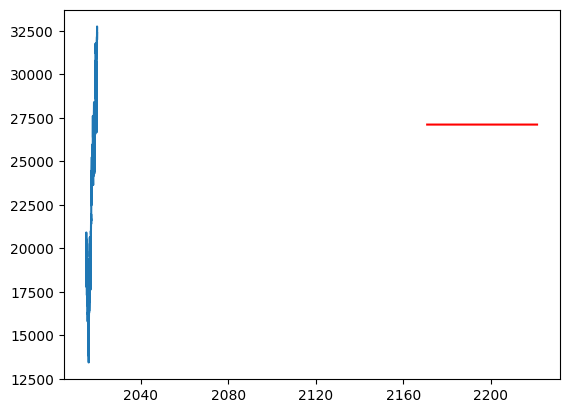

In [41]:
# Make predictions
start_date = len(train)
end_date = start_date + len(test)
predictions = model_fit.predict(start=start_date, end=end_date)
print(predictions)

# Plot the predictions
plt.plot(data.index, data['Close 5'])
plt.plot(predictions.index, predictions, 'r')
plt.show()